In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/home/inventor/Datasets/Boston house/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
corr_df = df.corr()
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


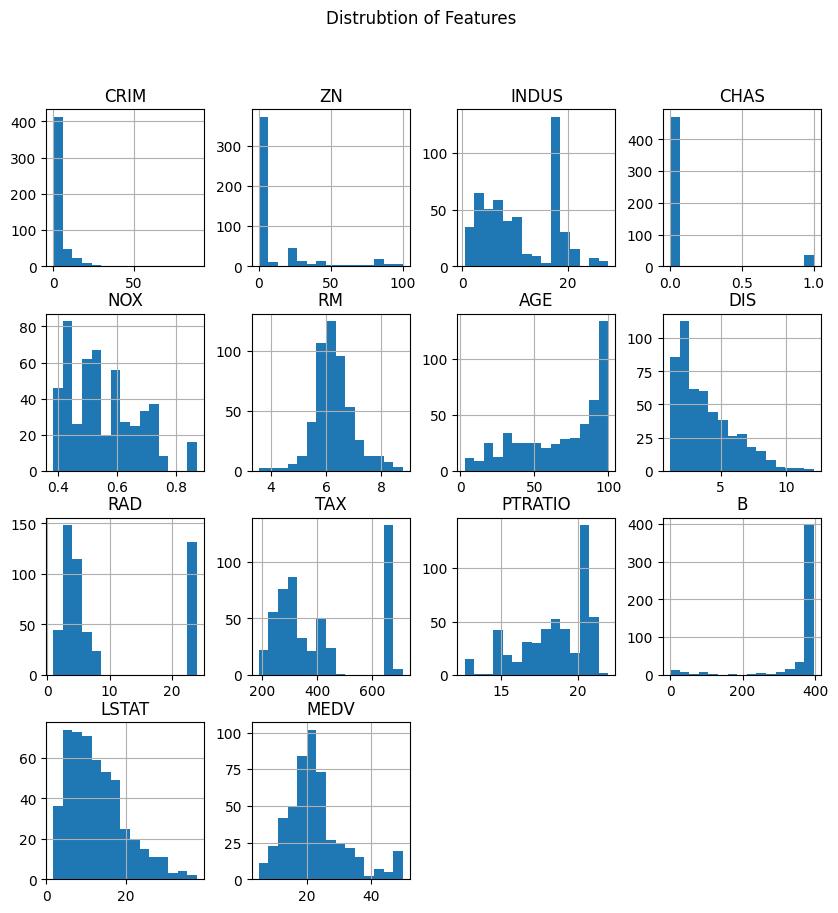

In [10]:
df.hist(figsize=(10,10), bins=15)
plt.suptitle(f"Distrubtion of Features")
plt.show()

In [11]:
import seaborn as sns

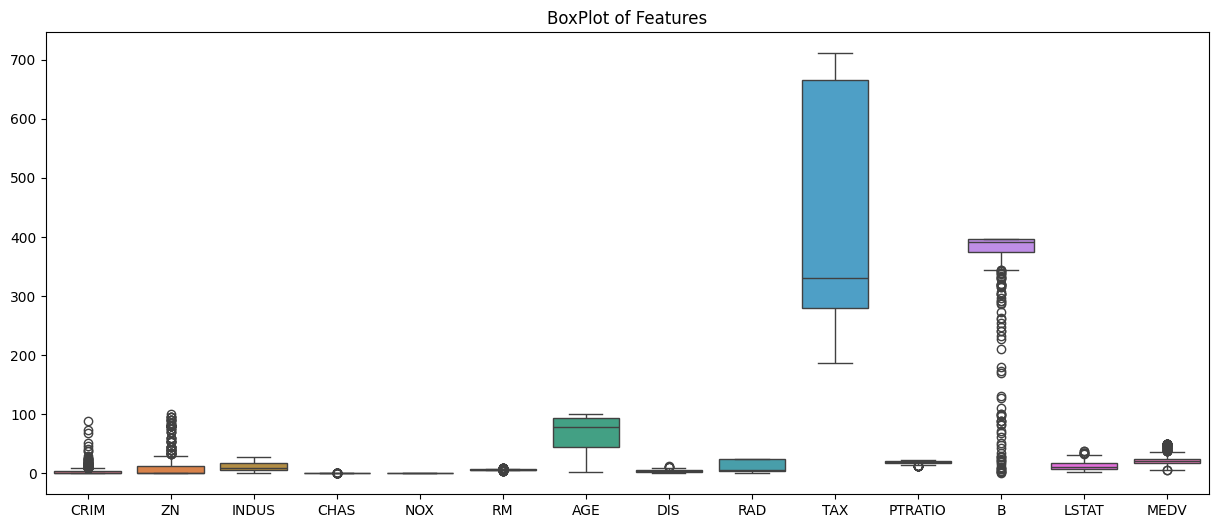

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(df)
plt.title(f"BoxPlot of Features")
plt.show()

In [13]:
def Z_score(data):

    mean_data = np.mean(data)
    std_data = np.std(data)

    Z_score = data - mean_data / std_data
    threshold = 3
    # identify outliers
    outliers = data[np.abs(Z_score) <= threshold]
    print(f"Z_score: {Z_score}")
    print(f"Outliers: {outliers}")

In [14]:
sorted_data = np.sort(df)
print(sorted_data)

# Find the Quartile 1 and Quartile 3
Q1 = np.percentile(sorted_data, 25)
Q3 = np.percentile(sorted_data, 75)
print(f"Quartile 1 {Q1}")
print(f"Quartile 2 {Q3}")

#  Find the IQR 
IQR = Q3 - Q1
print(f"IQR: {IQR}")

# Define the lower and upper bound
lower_bound = Q1 + 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outlier 
outlier = sorted_data[(sorted_data < lower_bound) | (sorted_data > upper_bound)]

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Outliers: {outlier}")

[[0.0000e+00 6.3200e-03 5.3800e-01 ... 6.5200e+01 2.9600e+02 3.9690e+02]
 [0.0000e+00 0.0000e+00 2.7310e-02 ... 7.8900e+01 2.4200e+02 3.9690e+02]
 [0.0000e+00 0.0000e+00 2.7290e-02 ... 6.1100e+01 2.4200e+02 3.9283e+02]
 ...
 [0.0000e+00 0.0000e+00 6.0760e-02 ... 9.1000e+01 2.7300e+02 3.9690e+02]
 [0.0000e+00 0.0000e+00 1.0959e-01 ... 8.9300e+01 2.7300e+02 3.9345e+02]
 [0.0000e+00 0.0000e+00 4.7410e-02 ... 8.0800e+01 2.7300e+02 3.9690e+02]]
Quartile 1 1.3744999999999998
Quartile 2 24.0
IQR: 22.6255
Lower bound: 35.312749999999994
Upper bound: 57.93825
Outliers: [0.000e+00 6.320e-03 5.380e-01 ... 8.080e+01 2.730e+02 3.969e+02]


In [15]:
mean_data = np.mean(df)
std_dev = np.std(df)

z_score = df - mean_data / std_dev

threshold = 3

outliers_zs = df[np.abs(z_score) <= threshold]

print(outliers_zs)

     CRIM   ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  PTRATIO   B  LSTAT  \
0     NaN  NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   
1     NaN  0.0   7.07   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN   9.14   
2     NaN  0.0   7.07   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   
3     NaN  0.0    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   
4     NaN  0.0    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   
..    ...  ...    ...   ...  ...  ..  ...  ...  ...  ...      ...  ..    ...   
501   NaN  0.0  11.93   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN   9.67   
502   NaN  0.0  11.93   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN   9.08   
503   NaN  0.0  11.93   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   
504   NaN  0.0  11.93   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN   6.48   
505   NaN  0.0  11.93   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN   7.88   

     MEDV  
0     NaN  
1     NaN  
2  

/home/inventor/Machine_learning/machinelearning/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


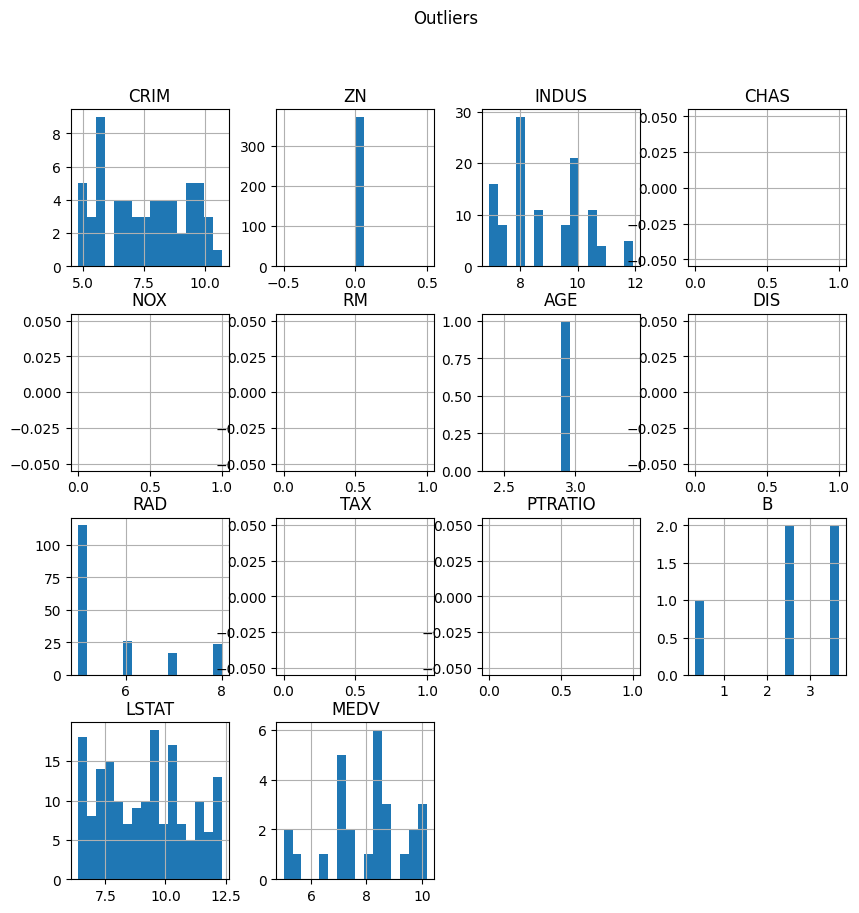

In [16]:
outliers_zs.hist(figsize=(10,10), bins=16)
plt.suptitle(f"Outliers")
plt.show()

In [17]:
if df.ndim == 1:
    df = df.reshape(-1, 1)

for i in range(df.shape[1]):

    column_data = df.iloc[:, i]

    # Step 1, Calculate the Q1, Q2, IQR
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    print(f"Column {df.columns[i]}: Lower bound= {lower_bound}, Upper bound={upper_bound}")

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    print(f"Column {df.columns[i]}: Outlier Count={len(outliers)}")

    if len(column_data) > 0:
        perc = len(outliers) / len(column_data) * 100

    else:
        perc = 0

    print(f"Column {df.columns[i]} outliers = {perc: .2f}%")

Column CRIM: Lower bound= -5.31051125, Upper bound=9.06963875
Column CRIM: Outlier Count=66
Column CRIM outliers =  13.04%
Column ZN: Lower bound= -18.75, Upper bound=31.25
Column ZN: Outlier Count=68
Column ZN outliers =  13.44%
Column INDUS: Lower bound= -14.175, Upper bound=37.465
Column INDUS: Outlier Count=0
Column INDUS outliers =  0.00%
Column CHAS: Lower bound= 0.0, Upper bound=0.0
Column CHAS: Outlier Count=35
Column CHAS outliers =  6.92%
Column NOX: Lower bound= 0.18650000000000005, Upper bound=0.8865
Column NOX: Outlier Count=0
Column NOX outliers =  0.00%
Column RM: Lower bound= 4.778499999999999, Upper bound=7.730500000000001
Column RM: Outlier Count=30
Column RM outliers =  5.93%
Column AGE: Lower bound= -28.54999999999999, Upper bound=167.64999999999998
Column AGE: Outlier Count=0
Column AGE outliers =  0.00%
Column DIS: Lower bound= -2.5322000000000005, Upper bound=9.820800000000002
Column DIS: Outlier Count=5
Column DIS outliers =  0.99%
Column RAD: Lower bound= -26.0

In [18]:
df.iloc[:, 13]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [19]:
df_cleaned = df.copy()


for i in range(df.shape[1]):

    column_data = df.iloc[:, i]

    Q1 = np.percentile(column_data, 25)
    Q2 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned.iloc[:, i] = df_cleaned.iloc[:, i].apply(
        lambda x: np.nan if (x < lower_bound or x > upper_bound) else x
        )

print(f"Shape of the data before removing outliers: {df.shape}")
print(f"Shape of the data after removing outliers: {df_cleaned.shape}")

Shape of the data before removing outliers: (506, 14)
Shape of the data after removing outliers: (506, 14)


In [20]:
df_cleaned.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,NaN,4.0900,1,NaN,15.3,NaN,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,NaN,4.9671,2,NaN,17.8,NaN,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,NaN,4.9671,2,NaN,17.8,NaN,4.03,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,NaN,6.0622,3,NaN,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,NaN,6.0622,3,NaN,18.7,NaN,5.33,NaN


In [21]:
df_cleaned.isnull().sum()

CRIM         3
ZN          35
INDUS        0
CHAS         0
NOX          0
RM           0
AGE        506
DIS          0
RAD          0
TAX        506
PTRATIO      0
B          506
LSTAT        0
MEDV        57
dtype: int64

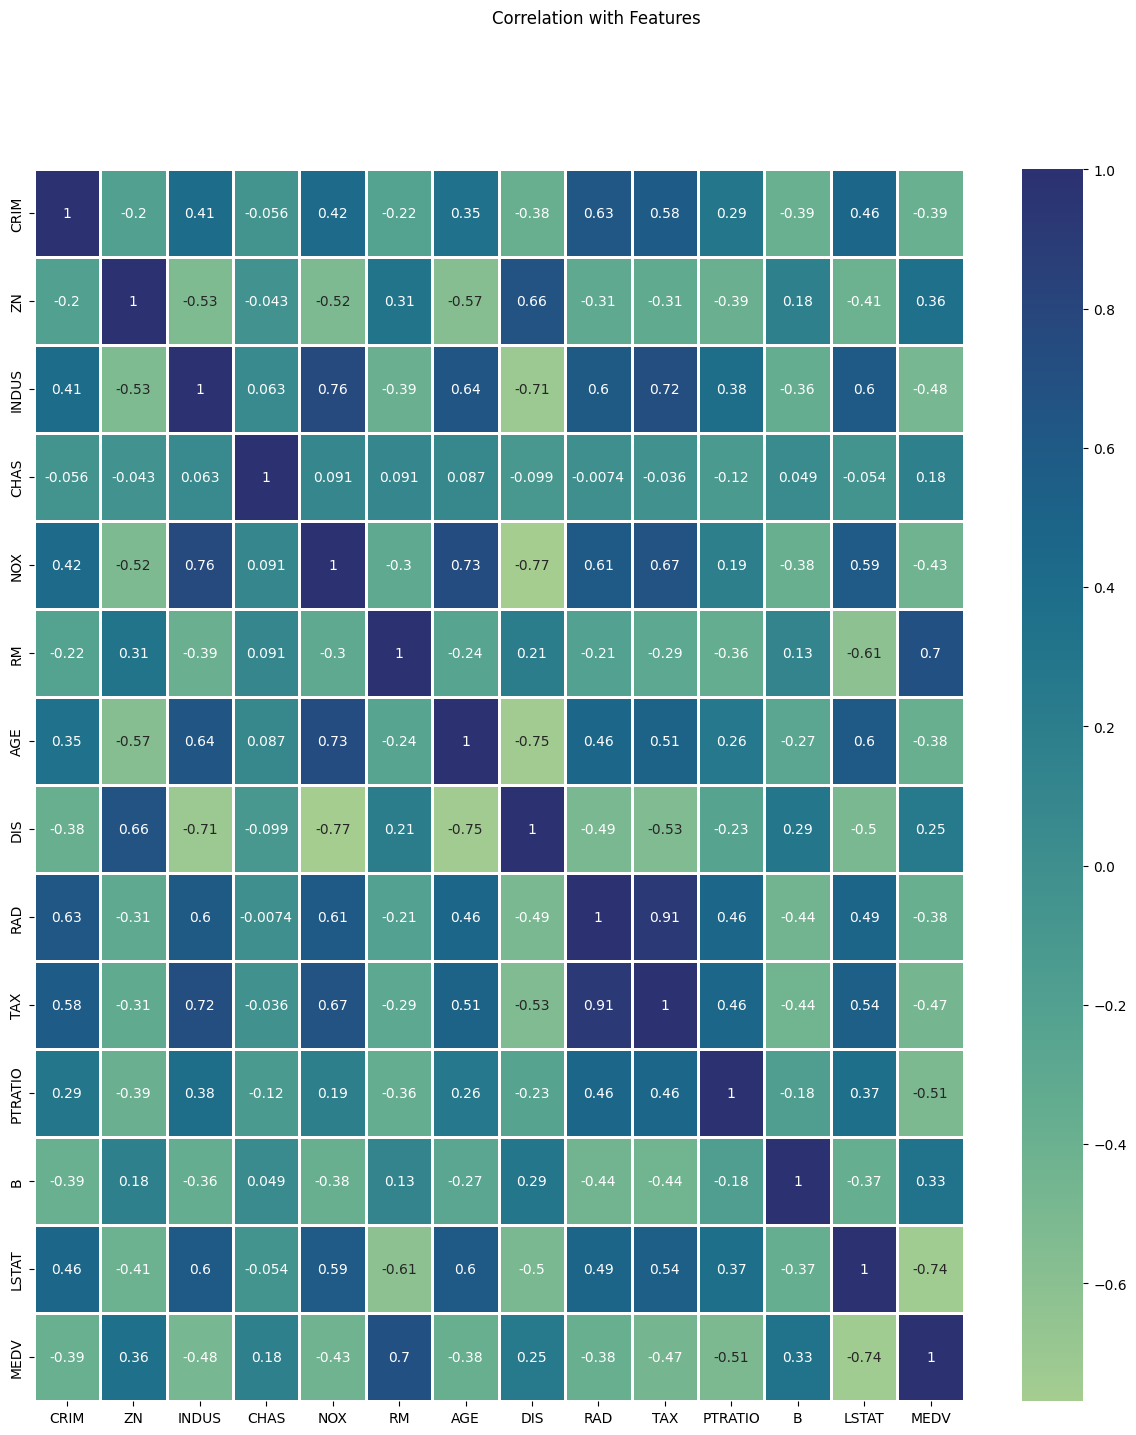

In [22]:
corr_df = df.corr()

plt.figure(figsize=(15,16))
sns.heatmap(corr_df, annot=True, cmap=sns.color_palette("crest", as_cmap=True), linewidths=0.8)
plt.suptitle("Correlation with Features")
plt.show()

In [23]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["MEDV"], test_size=0.2, random_state=42)

In [24]:
df.iloc[:, :-1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [26]:
y_train.ndim, y_test.ndim

(1, 1)

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_tr = ss.fit_transform(X_train)
X_test_tr = ss.transform(X_test)

In [28]:
# Custom Batch Gradient Descent Class

class batch_gradient_descent():

    def __init__(self, learning_rate, epochs):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0,1, axis=1)
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ =  np.zeros(1)

        for i in range(self.epochs):
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            intercept_slope = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ + (self.lr * intercept_slope)

            coef_slope = -2 * np.mean((y_train - y_hat) * X_train.shape[0])
            self.coef_ = self.coef_ + (self.lr * coef_slope)
        print(f"Intercept: {self.intercept_}\nCoef:{self.coef_}")
    
    def predict(self, X_test):
        X_test = np.insert(X_test, 0,1, axis=1)
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred
            


In [29]:
bgd = batch_gradient_descent(learning_rate=0.01, epochs=19)

In [30]:
bgd.fit(X_train=X_train, y_train=y_train)

Intercept: [6.58096858e+70]
Coef:[2.65871131e+73 2.65871131e+73 2.65871131e+73 2.65871131e+73
 2.65871131e+73 2.65871131e+73 2.65871131e+73 2.65871131e+73
 2.65871131e+73 2.65871131e+73 2.65871131e+73 2.65871131e+73
 2.65871131e+73 2.65871131e+73]


In [31]:
y_pred = bgd.predict(X_test=X_test)

In [32]:
def r2_score_custom(y_true, y_pred):
    mean_value = np.mean(y_true)

    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)

    r2_score_ = SSE / TSS
    return r2_score_

In [33]:
r2_score_c = r2_score_custom(y_true=y_test, y_pred=y_pred)
print(f"R2 score Custom: {r2_score_c:.1}")

R2 score Custom: 9e+150


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred_sk = lr.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
r2_score_sk = r2_score(y_true=y_test, y_pred=y_pred_sk)
print(f"R2 Score scikit-learn: {r2_score_sk}")

R2 Score scikit-learn: 0.6687594935356326


In [39]:
class Multiple_Linear_Regression():

    def __init__(self):
        self.intercept_ = None
        self.coef_ = None
    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0,1, axis=1)
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self, X_test):
        y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred

In [40]:
mlr = Multiple_Linear_Regression()

In [41]:
mlr.fit(X_train, y_train)

In [42]:
y_pred_ml = mlr.predict(X_test)

In [43]:
r2_score_ml = r2_score_custom(y_true=y_test, y_pred=y_pred_ml)

In [44]:
print(f"R2 Score for OLS Method: {r2_score_ml}")
print(f"R2 Score Scikit-learn; {r2_score_sk}")

R2 Score for OLS Method: 0.3312405064644245
R2 Score Scikit-learn; 0.6687594935356326
